# **Project Overview**

*   Project: Perqara Assessment Data Scientist





# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta, datetime

# **Load, Join Data & Create Master Table**

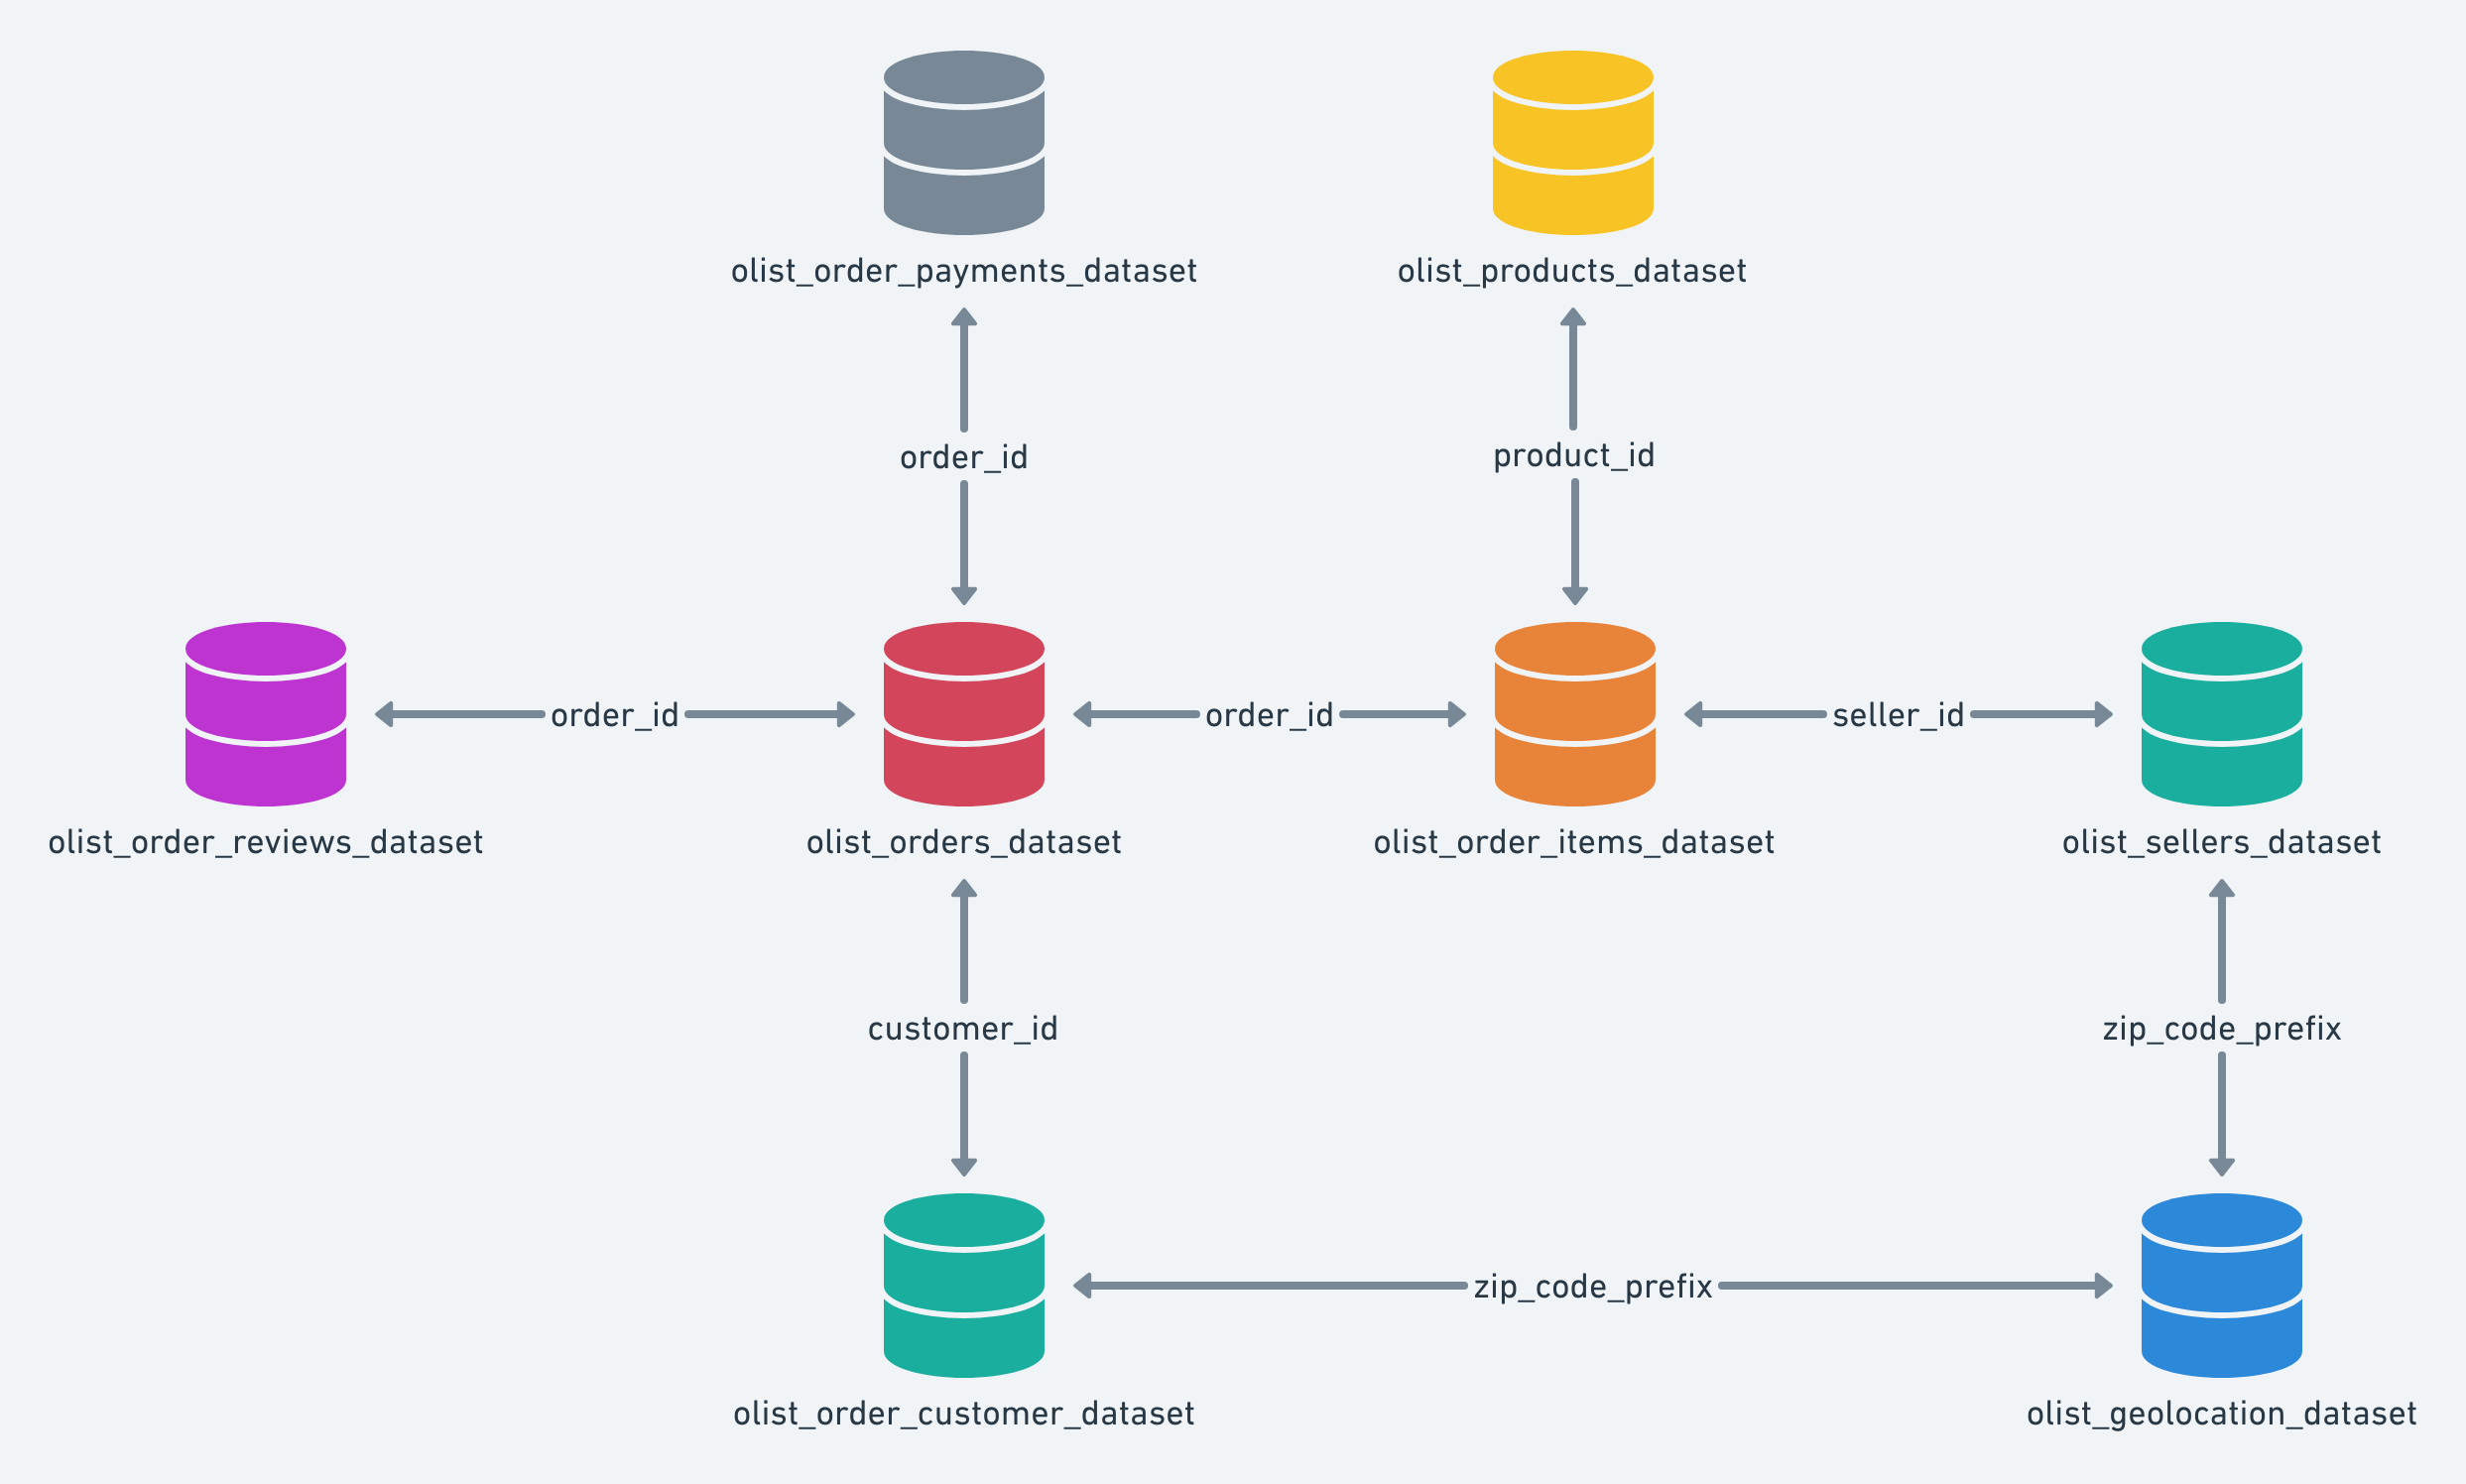

## **Load Data & Pre-Cleaning**

In [5]:
cust = pd.read_csv('20220721_D&I_Assesment Data\data\customers_dataset.csv')
geo = pd.read_csv('20220721_D&I_Assesment Data\data\geolocation_dataset.csv')
order_items = pd.read_csv('20220721_D&I_Assesment Data\data\order_items_dataset.csv')
order_pay = pd.read_csv('20220721_D&I_Assesment Data\data\order_payments_dataset.csv')
order_reviews = pd.read_csv('20220721_D&I_Assesment Data\data\order_reviews_dataset.csv')
orders = pd.read_csv('20220721_D&I_Assesment Data\data\orders_dataset.csv')
products = pd.read_csv('20220721_D&I_Assesment Data\data\products_dataset.csv')
sellers = pd.read_csv('20220721_D&I_Assesment Data\data\sellers_dataset.csv')
product_cat = pd.read_csv('20220721_D&I_Assesment Data\data\product_category_name_translation.csv')

**Customers Table**

In [6]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Description:
*   customer_id: key to the orders dataset. Each order has a unique customer_id
*   customer_unique_id: unique identifier of a customer
*   customer_zip_code_prefix: first five digits of customer zip code
*   customer_city: customer city name (sao paulo 16%, rio de janeiro 7%, Other(77019) 77%)
*   customer state (SP 42%, RJ 13%, Other (44843) 45%)







In [7]:
cust.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Geolocation Table**

In [8]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Description:
*   geolocation_zip_code_prefix: first 5 digits of zip code
*   geolocation_lat: latitude
*   geolocation_lngx: longitude
*   geolocation_city: city name (sao paulo 14%, rio de janeiro 6%, Other (802212) 80%)
*   geolocation_state: state (SP 40%, MG 13%, Other (469559) 47%)

In [9]:
geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

I'm not gonna use this table

**Order Items Table**

In [10]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Description:
*   order_id: order unique identifier
*   order_item_id: sequential number identifying number of items included in the same order
*   product id: product unique identifier
*   seller_id: seller unique identifier
*   shipping_limit_date: shows the seller shipping limit date for handling the order over to the logistic partner
*   price: item price
*   freight_value: item freight value item (if an order has more than one item the freight value is splitted between items)



In [11]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [12]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Order Payment**

In [13]:
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Description:
*   order_id: order unique identifier
*   payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to
*   payment_type: method of payment chosen by the customer (credit_card 74%, boleto 19%, Other (7307) 7%)
*   payment_installments: number of installments chosen by the customer
*   payment_value: transaction value


In [14]:
order_pay.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Order Reviews**

In [15]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Description:
*   review_score: Note ranging from 1 to 5 given by the customer on a satisfaction survey
*   review_comment_title: Comment title from the review left by the customer, in Portuguese (88% null)
*   review_comment_message: Comment message from the review left by the customer, in Portuguese (59% null)





I'm not gonna use this table

**Orders Table**

In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Description:
*   order_id: order unique identifier
*   customer_id: key to the customer dataset. Each order has a unique customer_id
*   order_status: Reference to the order status (delivered 97%, shipped 1%, other 2%).
*   order_purchase_timestamp: Shows the purchase timestamp
*   order_approved_at: Shows the payment approval timestamp
*   order_delivered_carrier_date: Shows the order posting timestamp. When it was handled to the logistic partner
*   order_delivered_customer_date: Shows the actual order delivery date to the customer
*   order_estimated_delivery_date: Shows the estimated delivery date that was informed to customer at the purchase moment




In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
counts = orders.isna().sum().sort_values(ascending=False)

percents = round(orders.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

,null_counts,%
order_delivered_customer_date,2965,2.98
order_delivered_carrier_date,1783,1.79
order_approved_at,160,0.16
order_id,0,0.00
customer_id,0,0.00
order_status,0,0.00
order_purchase_timestamp,0,0.00
order_estimated_delivery_date,0,0.00


Because the total of null values only 4,93%. I decided to drop it

In [16]:
columns_with_null = ['order_delivered_customer_date', 'order_delivered_carrier_date', 'order_approved_at']
orders.dropna(subset=columns_with_null, inplace=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [108]:
counts = orders.isna().sum().sort_values(ascending=False)

percents = round(orders.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

,null_counts,%
order_id,0,0.0
customer_id,0,0.0
order_status,0,0.0
order_purchase_timestamp,0,0.0
order_approved_at,0,0.0
order_delivered_carrier_date,0,0.0
order_delivered_customer_date,0,0.0
order_estimated_delivery_date,0,0.0


**Products Table**

In [17]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Description:
*   product id: product unique identifier
*   product_category_name: root category of product



In [18]:
counts = products.isna().sum().sort_values(ascending=False)

percents = round(products.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

,null_counts,%
product_category_name,610,1.85
product_name_lenght,610,1.85
product_description_lenght,610,1.85
product_photos_qty,610,1.85
product_weight_g,2,0.01
product_length_cm,2,0.01
product_height_cm,2,0.01
product_width_cm,2,0.01
product_id,0,0.00


Because the total of null values only 7,44%. I decided to drop it

In [19]:
columns_null = [
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]
products.dropna(subset=columns_null, inplace=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [20]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Description:
*   seller_id: seller unique identifier
*   seller_zip_code_prefix: first 5 digits of seller zip code



I'm not gonna use this table

In [21]:
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Description:
*   product_category_name: category name in Portuguese (71 unique values)
*   product_category_name_english: category name in English (71 unique values)

In [22]:
product_cat.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

## **Join, Pre-Cleaning & Create Master Table**

In [23]:
df1 = order_items.merge(order_pay, on='order_id')
print(df1.shape)
df2 = df1.merge(products, on='product_id')
print(df2.shape)
df3 = df2.merge(orders, on='order_id')
print(df3.shape)
df4 = df3.merge(product_cat, on='product_category_name')
print(df4.shape)
df= df4.merge(cust, on='customer_id')
print(df.shape)

(117601, 11)
(115902, 19)
(113390, 26)
(113367, 27)
(113367, 31)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 113366
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   order_item_id                  113367 non-null  int64  
 2   product_id                     113367 non-null  object 
 3   seller_id                      113367 non-null  object 
 4   shipping_limit_date            113367 non-null  object 
 5   price                          113367 non-null  float64
 6   freight_value                  113367 non-null  float64
 7   payment_sequential             113367 non-null  int64  
 8   payment_type                   113367 non-null  object 
 9   payment_installments           113367 non-null  int64  
 10  payment_value                  113367 non-null  float64
 11  product_category_name          113367 non-null  object 
 12  product_name_lenght           

**Converting date columns to datetime**

In [25]:
date_columns = ['shipping_limit_date', 'order_purchase_timestamp',
                'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date',
                'order_estimated_delivery_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 113366
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113367 non-null  object        
 1   order_item_id                  113367 non-null  int64         
 2   product_id                     113367 non-null  object        
 3   seller_id                      113367 non-null  object        
 4   shipping_limit_date            113367 non-null  datetime64[ns]
 5   price                          113367 non-null  float64       
 6   freight_value                  113367 non-null  float64       
 7   payment_sequential             113367 non-null  int64         
 8   payment_type                   113367 non-null  object        
 9   payment_installments           113367 non-null  int64         
 10  payment_value                  113367 non-null  float64       
 11  

Succesfully changed object data type to date time data type

**Export to csv for documentation**

In [27]:
df.to_csv('/content/Olist_Master.csv', date_format='%Y-%m-%d %H:%M:%S', index=False)

# **Exploratory Data Analysis (EDA)**

In [28]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,...,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,cool_stuff,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,...,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,cool_stuff,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,...,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,cool_stuff,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,...,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,cool_stuff,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 113366
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113367 non-null  object        
 1   order_item_id                  113367 non-null  int64         
 2   product_id                     113367 non-null  object        
 3   seller_id                      113367 non-null  object        
 4   shipping_limit_date            113367 non-null  datetime64[ns]
 5   price                          113367 non-null  float64       
 6   freight_value                  113367 non-null  float64       
 7   payment_sequential             113367 non-null  int64         
 8   payment_type                   113367 non-null  object        
 9   payment_installments           113367 non-null  int64         
 10  payment_value                  113367 non-null  float64       
 11  

**Statistical Summary**

In [30]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix
count,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000
mean,1.196856,120.161067,20.024231,1.089947,2.942532,172.222013,48.800427,785.794746,2.209241,2110.532633,30.282834,16.617411,23.099694,35081.859236
std,0.701325,182.714900,15.753323,0.682120,2.777846,266.576121,10.018615,651.018280,1.720307,3770.553691,16.161733,13.448605,11.741288,29845.463618
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,61.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11320.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.140000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24325.000000
75%,1.000000,133.700000,21.200000,1.000000,4.000000,189.370000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58775.000000
max,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000


In [31]:
#showing the precise value counts
for col in df:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(),'\n')

Value counts of order_id column
895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
ccf804e764ed5650cd8759557269dc13    26
465c2e1bee4561cb39e0db8c5993aafc    24
c6492b842ac190db807c15aff21a7dd6    24
                                    ..
311251ba5bfaf2e67111e56ddee44f14     1
31002d1cf4364e884a8a59e0e0bc2373     1
30ef7c120f099b71e0e0eae30f95c954     1
30e5f6d1724b24b1d19d90ec48d9c7d6     1
bede3503afed051733eeb4a84d1adcc5     1
Name: order_id, Length: 95109, dtype: int64 

Value counts of order_item_id column
1     99279
2      9927
3      2301
4       948
5       445
6       253
7        60
8        35
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64 

Value counts of product_id column
aca2eb7d00ea1a7b8ebd4e68314663af    529
99a4788cb24856965c36a24e339b6058    513
422879e10f46682990de24d770e7f83d    505
389d119b48cf30

In [32]:
categorical = ['object']
categorical_columns = df.select_dtypes(include=categorical).columns

df[categorical_columns].describe()

,order_id,product_id,seller_id,payment_type,product_category_name,customer_id,order_status,product_category_name_english,customer_unique_id,customer_city,customer_state
count,113367,113367,113367,113367,113367,113367,113367,113367,113367,113367,113367
unique,95109,31614,2912,4,71,95109,2,71,92062,4073,27
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,credit_card,cama_mesa_banho,270c23a11d024a44c896d1894b261a83,delivered,bed_bath_table,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP
freq,63,529,2094,83695,11649,63,113360,11649,75,17867,47819


In [33]:
date = ['datetime64[ns]']
date_columns = df.select_dtypes(include=date).columns

df[date_columns].describe()

,shipping_limit_date,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,113367,113367,113367,113367,113367,113367
unique,90112,94605,87112,78909,94321,444
top,2017-08-14 20:43:31,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00
freq,63,63,63,63,63,637
first,2016-10-08 10:34:01,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00
last,2020-04-09 22:35:08,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


**KDE Plot**

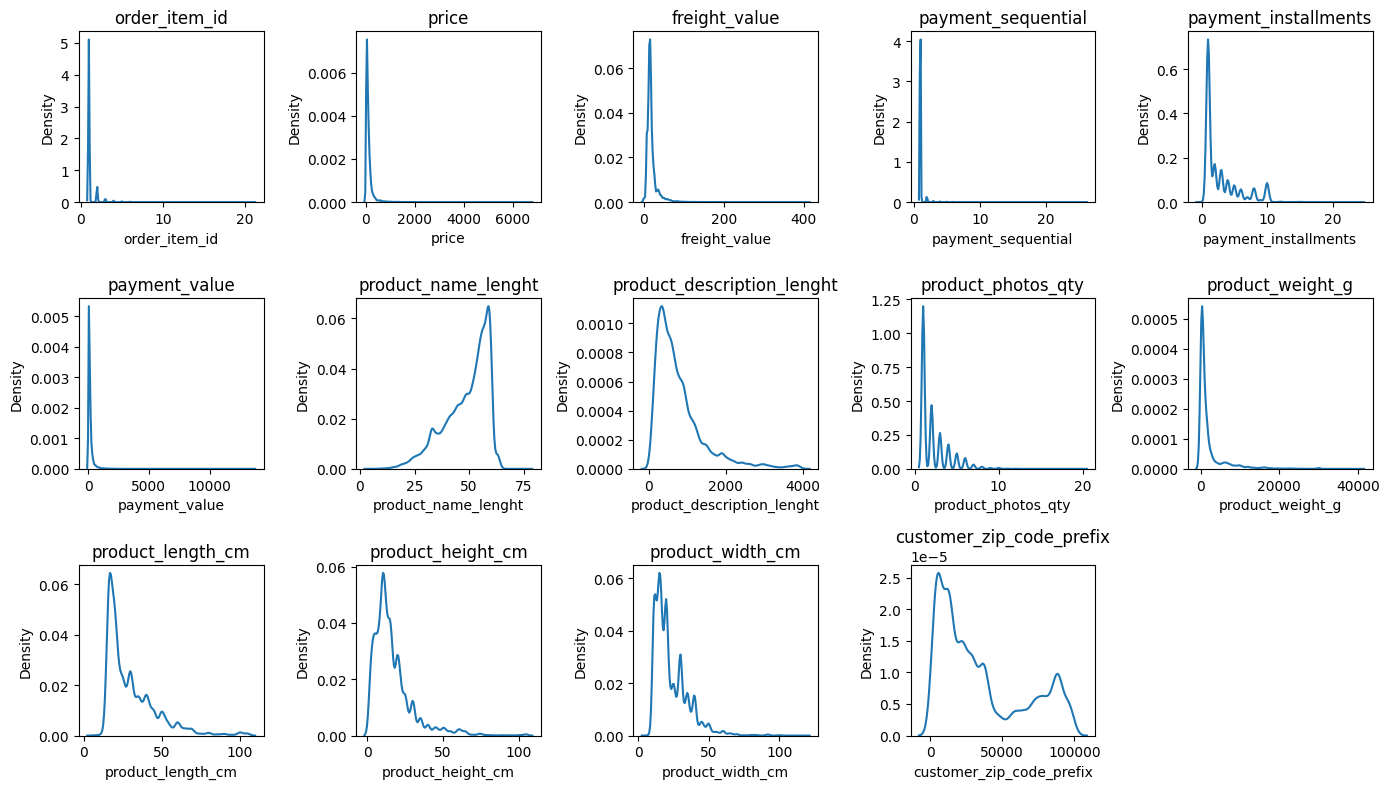

In [34]:
plt.figure(figsize=(14, 8))
num_subplots = min(len(df.columns), 15)

numeric_columns = df.select_dtypes(include=['number']).columns

for i, col in enumerate(numeric_columns[:num_subplots]):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

**Correlation Heatmap**

<Axes: >

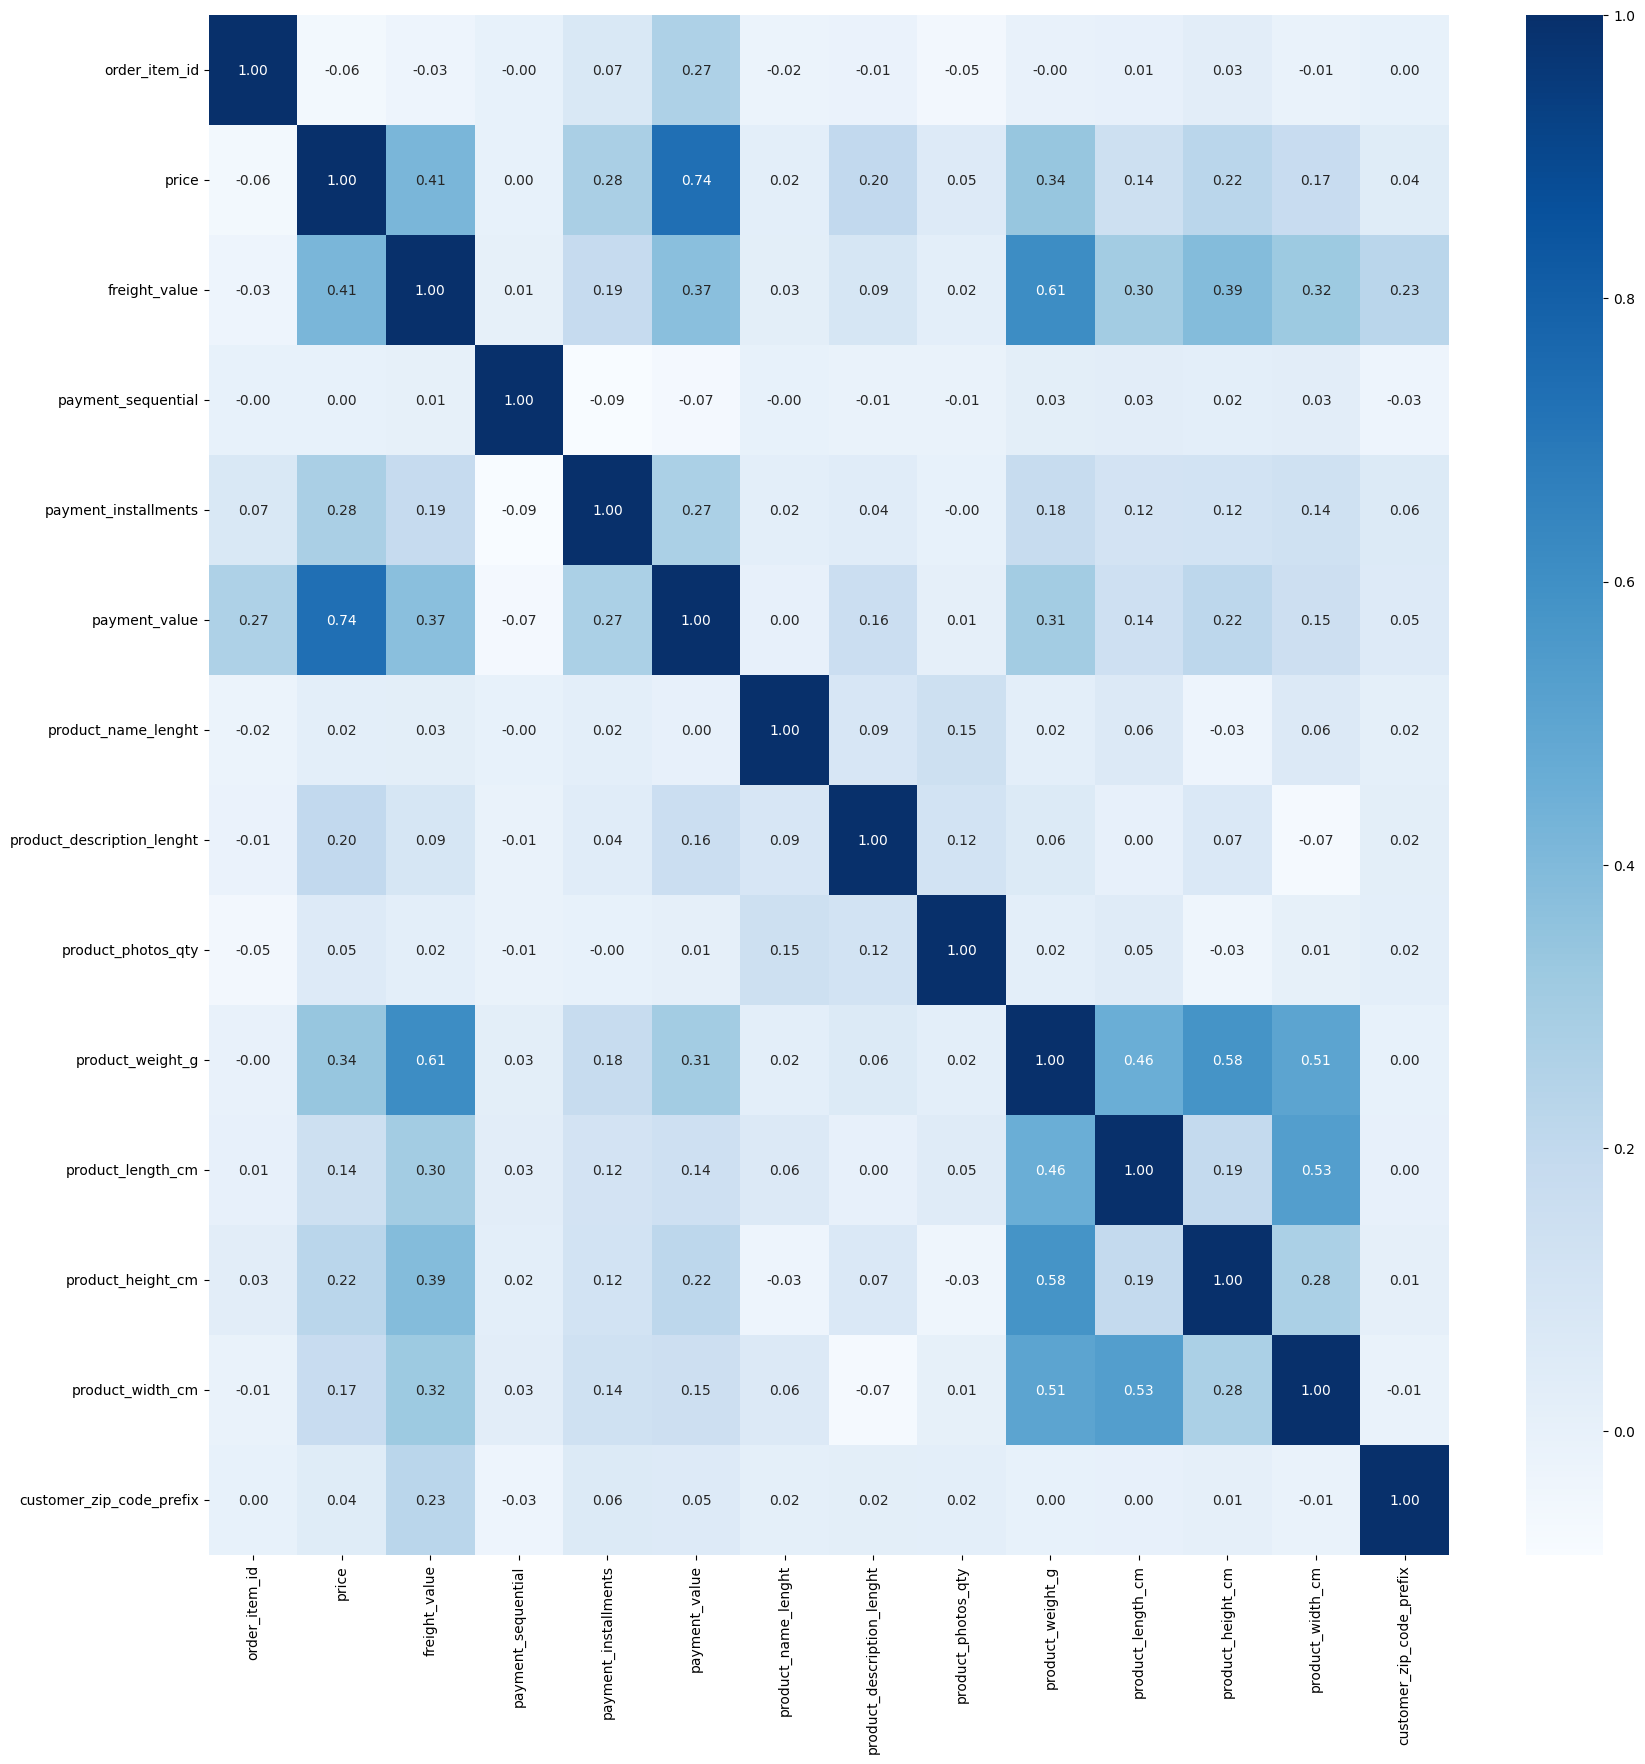

In [35]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Outlier Check**

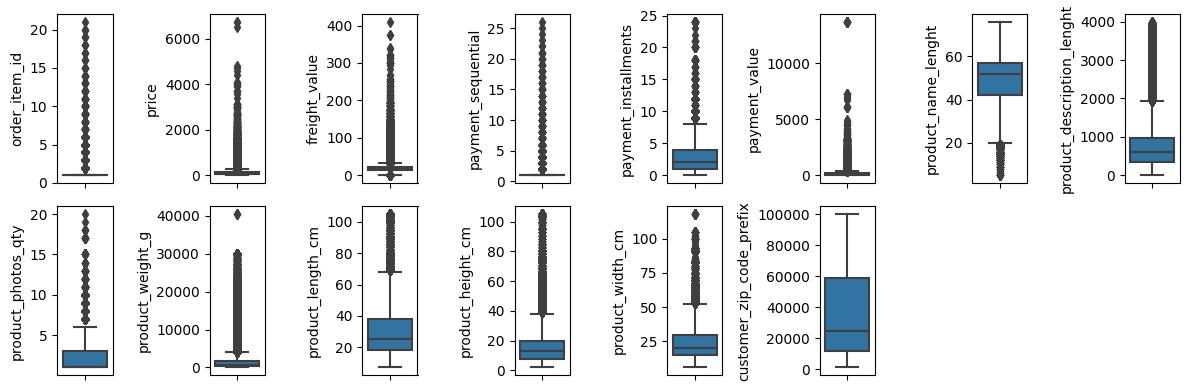

In [36]:
plt.figure(figsize = (12,4))
for i in range(0, len(numeric_columns)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df[numeric_columns[i]], orient='v')
    plt.tight_layout()

## **Pre-Processing for Deep Dive EDA**

**Breakdown order purchase date into hour, day, etc**

In [37]:
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 113366
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113367 non-null  object        
 1   order_item_id                  113367 non-null  int64         
 2   product_id                     113367 non-null  object        
 3   seller_id                      113367 non-null  object        
 4   shipping_limit_date            113367 non-null  datetime64[ns]
 5   price                          113367 non-null  float64       
 6   freight_value                  113367 non-null  float64       
 7   payment_sequential             113367 non-null  int64         
 8   payment_type                   113367 non-null  object        
 9   payment_installments           113367 non-null  int64         
 10  payment_value                  113367 non-null  float64       
 11  

**Add revenue column**

In [39]:
df['revenue'] = df['order_item_id'] * df['price']

**For cohort analysis**

In [40]:
cohort = df[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'product_category_name', 'customer_state']].drop_duplicates()

In [41]:
cohort['OrderMonth'] = cohort['order_purchase_timestamp'].dt.to_period('M')
cohort['CohortGroup'] = cohort.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M')

In [42]:
from operator import attrgetter
import matplotlib.colors as mcolors
df_cohort = cohort.groupby(['CohortGroup', 'OrderMonth']) \
              .agg(n_customers=('customer_unique_id', 'count')) \
              .reset_index(drop=False)
df_cohort['PeriodIndex'] = (df_cohort.OrderMonth - df_cohort.CohortGroup).apply(attrgetter('n'))

def get_data(df_cohort):
    cohort_pivot = df_cohort.pivot_table(index = 'CohortGroup',
                                     columns = 'PeriodIndex',
                                     values = 'n_customers')
    #cohort_pivot.iloc[:,0]= (cohort_pivot.iloc[:,0].divide(25, axis = 0)).astype(int)
    #cohort_pivot.iloc[:,1:] = cohort_pivot.iloc[:,0:].divide(2, axis = 0)
    cohort_pivot = cohort_pivot.iloc[4:-1,:-5]
    return cohort_pivot

cohort_pivot_ = get_data(df_cohort)
cohort_pivot_

PeriodIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
CohortGroup,,,,,,,,,,,,,,,
2017-03,2500.0,12.0,9.0,11.0,9.0,4.0,4.0,8.0,8.0,2.0,8.0,4.0,5.0,3.0,5.0
2017-04,2237.0,15.0,6.0,5.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0
2017-05,3459.0,17.0,15.0,10.0,10.0,12.0,15.0,5.0,8.0,10.0,9.0,10.0,8.0,1.0,6.0
2017-06,3054.0,16.0,12.0,13.0,10.0,12.0,10.0,7.0,4.0,5.0,9.0,11.0,5.0,6.0,10.0
2017-07,3815.0,24.0,13.0,9.0,12.0,8.0,12.0,4.0,8.0,11.0,9.0,12.0,5.0,9.0,NaN
2017-08,4113.0,29.0,17.0,11.0,14.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,NaN,NaN
2017-09,4040.0,28.0,20.0,16.0,19.0,12.0,10.0,10.0,11.0,7.0,10.0,3.0,NaN,NaN,NaN
2017-10,4362.0,32.0,11.0,3.0,11.0,9.0,10.0,17.0,13.0,8.0,9.0,NaN,NaN,NaN,NaN
2017-11,7115.0,43.0,28.0,11.0,12.0,14.0,9.0,14.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN


In [43]:
cohort_size = cohort_pivot_.iloc[:,0]
retention_matrix = cohort_pivot_.divide(cohort_size, axis = 0)

In [44]:
retention_matrix

PeriodIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
CohortGroup,,,,,,,,,,,,,,,
2017-03,1.0,0.004800,0.003600,0.004400,0.003600,0.001600,0.001600,0.003200,0.003200,0.000800,0.003200,0.001600,0.002000,0.001200,0.002000
2017-04,1.0,0.006705,0.002682,0.002235,0.002682,0.002682,0.003576,0.003129,0.003129,0.001788,0.002682,0.000894,0.000447,0.000447,0.000894
2017-05,1.0,0.004915,0.004337,0.002891,0.002891,0.003469,0.004337,0.001446,0.002313,0.002891,0.002602,0.002891,0.002313,0.000289,0.001735
2017-06,1.0,0.005239,0.003929,0.004257,0.003274,0.003929,0.003274,0.002292,0.001310,0.001637,0.002947,0.003602,0.001637,0.001965,0.003274
2017-07,1.0,0.006291,0.003408,0.002359,0.003145,0.002097,0.003145,0.001048,0.002097,0.002883,0.002359,0.003145,0.001311,0.002359,NaN
2017-08,1.0,0.007051,0.004133,0.002674,0.003404,0.005349,0.002918,0.002674,0.001459,0.001459,0.002431,0.001945,0.000973,NaN,NaN
2017-09,1.0,0.006931,0.004950,0.003960,0.004703,0.002970,0.002475,0.002475,0.002723,0.001733,0.002475,0.000743,NaN,NaN,NaN
2017-10,1.0,0.007336,0.002522,0.000688,0.002522,0.002063,0.002293,0.003897,0.002980,0.001834,0.002063,NaN,NaN,NaN,NaN
2017-11,1.0,0.006044,0.003935,0.001546,0.001687,0.001968,0.001265,0.001968,0.001124,0.000703,NaN,NaN,NaN,NaN,NaN


## **Deep Dive EDA for Marketing Analysis**

**How is total order and revenue over time?**

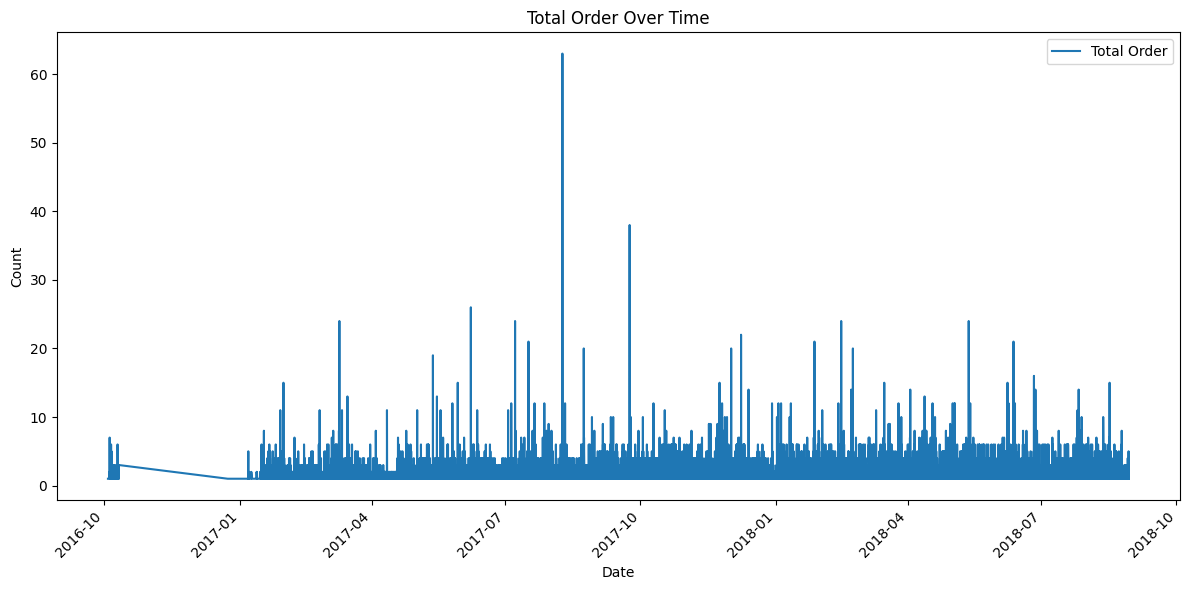

In [45]:
item_count_by_date = df.groupby('order_purchase_timestamp')['order_id'].count()

# Create a time series plot for the count of order_item_id
plt.figure(figsize=(12, 6))
item_count_by_date.plot(label='Total Order')

# Customize the plot
plt.title('Total Order Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

There's a huge total order occured on black friday

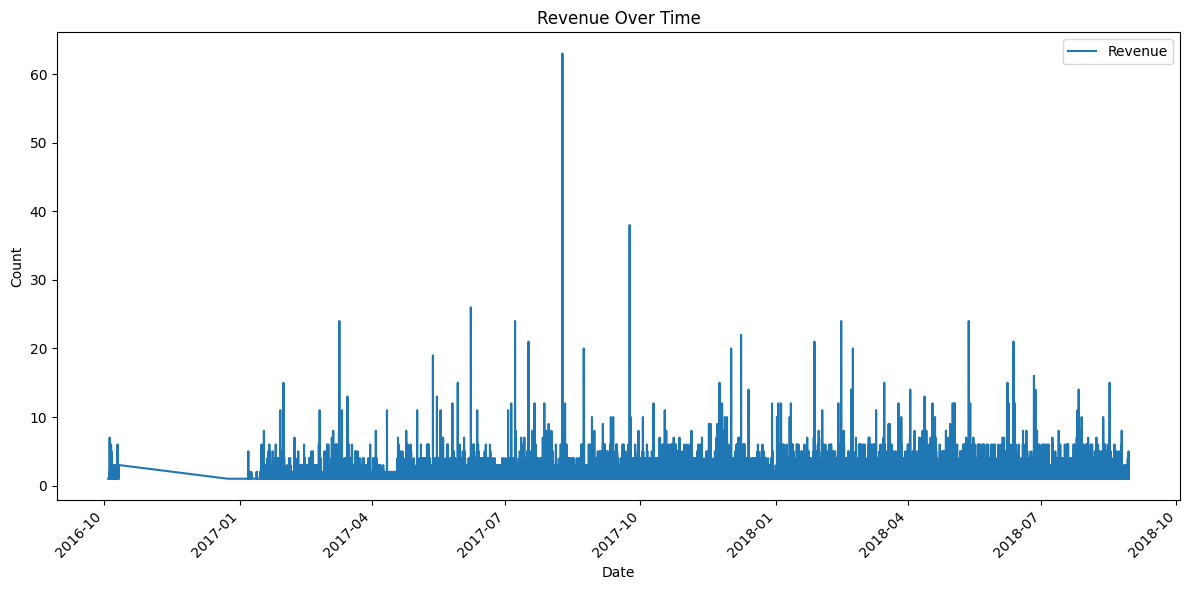

In [46]:
item_count_by_date = df.groupby('order_purchase_timestamp')['revenue'].count()

# Create a time series plot for the count of order_item_id
plt.figure(figsize=(12, 6))
item_count_by_date.plot(label='Revenue')

# Customize the plot
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

There's a huge revenue occured on black friday

**What is the most used payment method by customers?**  

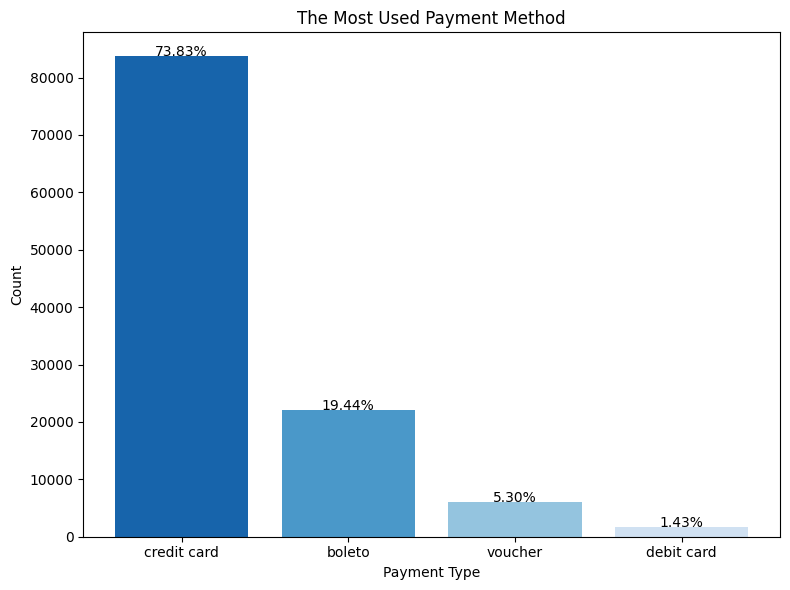

In [47]:
# Create a DataFrame with the payment_type data
data = df['payment_type'].value_counts().reset_index()
data.columns = ['Payment Type', 'Count']

# Calculate the percentage for each payment type
total_count = data['Count'].sum()
data['Percentage'] = (data['Count'] / total_count) * 100

# Define a blue gradient color palette in reverse order
colors = sns.color_palette("Blues_r", len(data))

# Create a bar plot with payment types on the x-axis
plt.figure(figsize=(8, 6))
bars = plt.bar(data['Payment Type'], data['Count'], color=colors)

# Display the percentage on top of each bar
for bar, percentage in zip(bars, data['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 3, f'{percentage:.2f}%', ha='center')

plt.title('The Most Used Payment Method')
plt.xlabel('Payment Type')
plt.ylabel('Count')

plt.xticks(ticks=range(len(df['payment_type'].unique())),
           labels=[label.replace('_', ' ') for label in df['payment_type'].unique()])

plt.tight_layout()
plt.show()

Olist can create colaborative campaign with credit card company

In [48]:
# plt.figure(figsize=(4,3))
# sns.countplot(df,x='payment_type')
# plt.title('The Most Used Payment Method')
# plt.xlabel('Payment Type')
# plt.show()

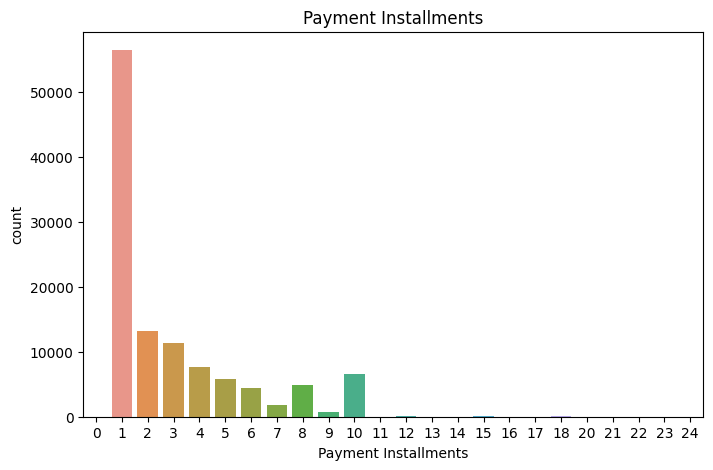

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(df,x='payment_installments')
plt.title('Payment Installments')
plt.xlabel('Payment Installments')
plt.show()

**On what day and time do customers tend to make transactions?**

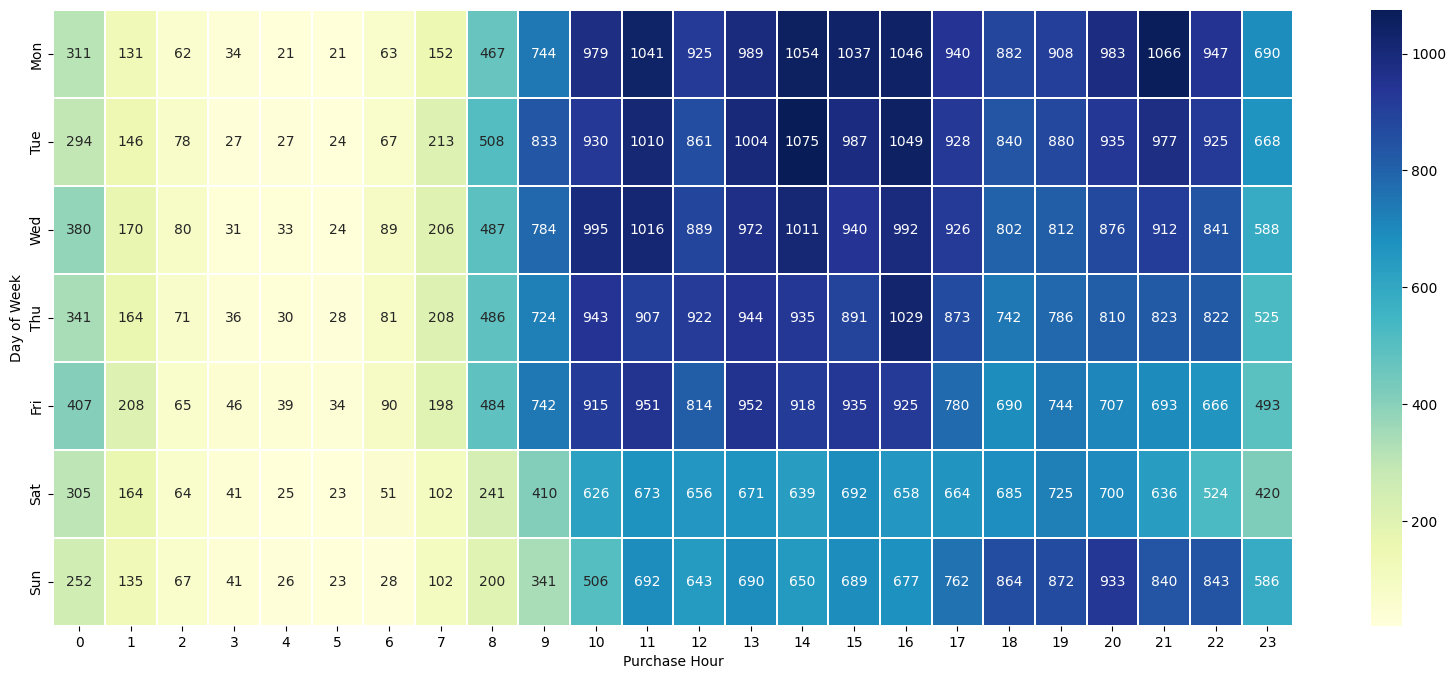

In [50]:
purchase_count = df.groupby(['order_purchase_day', 'order_purchase_hour']).nunique()['order_id'].unstack()
plt.figure(figsize=(20,8))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap="YlGnBu", annot=True, fmt="d", linewidths=0.2)
plt.xlabel('Purchase Hour')
plt.ylabel('Day of Week')
plt.show()

Highest transactions occured on weekdays especially on 10 AM - 16 AM

**What items and products category generate most revenue?**

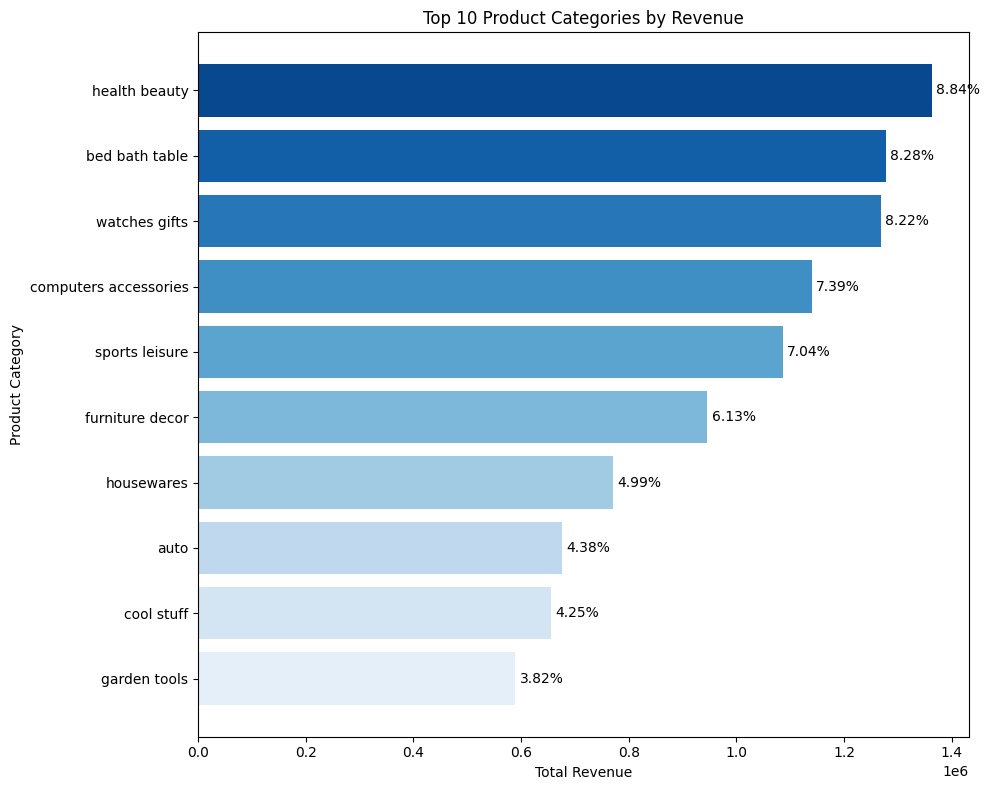

In [51]:
# Group by product category and calculate total revenue
category_revenue = df.groupby('product_category_name_english')['revenue'].sum().reset_index()

# Calculate the total revenue for all categories
total_revenue = category_revenue['revenue'].sum()

# Sort the data by revenue in descending order
category_revenue = category_revenue.sort_values(by='revenue', ascending=False)

# Select the top 10 product categories
top_10_categories = category_revenue.head(10)

# Define a gradient navy color palette
colors = sns.color_palette("Blues_r", len(top_10_categories))

# Create a horizontal bar plot with product categories on the y-axis
plt.figure(figsize=(10, 8))
bars = plt.barh(top_10_categories['product_category_name_english'], top_10_categories['revenue'], color=colors)
plt.ylabel('Product Category')
plt.xlabel('Total Revenue')
plt.title('Top 10 Product Categories by Revenue')

# Modify y-tick labels to remove "_" and replace with space
plt.yticks(
    ticks=range(len(top_10_categories['product_category_name_english'])),
    labels=[label.replace('_', ' ') for label in top_10_categories['product_category_name_english']]
)

# Add data values (percentage of total revenue) on the right side of each bar
for bar in bars:
    width = bar.get_width()
    percentage = (width / total_revenue) * 100
    plt.annotate(f'{percentage:.2f}%', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(3, 0),
                 textcoords='offset points', ha='left', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis for descending order
plt.tight_layout()
plt.show()

campaigns can focus on product categories that generate a lot of income such as beauty day campaigns, etc & can collaborate with beauty companies to generate more income

In [52]:
# category_revenue = df.groupby('product_category_name_english')['revenue'].sum().reset_index()

# # Sort the data by revenue in descending order
# category_revenue = category_revenue.sort_values(by='revenue', ascending=False)

# # Select the top 10 product categories
# top_10_categories = category_revenue.head(10)

# # Create a bar plot for the top 10 product categories generating the most revenue
# plt.figure(figsize=(12, 6))
# plt.bar(top_10_categories['product_category_name_english'], top_10_categories['revenue'])
# plt.xlabel('Product Category')
# plt.ylabel('Total Revenue')
# plt.title('Top 10 Product Categories by Revenue')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

**What is the most popular items and products category?**

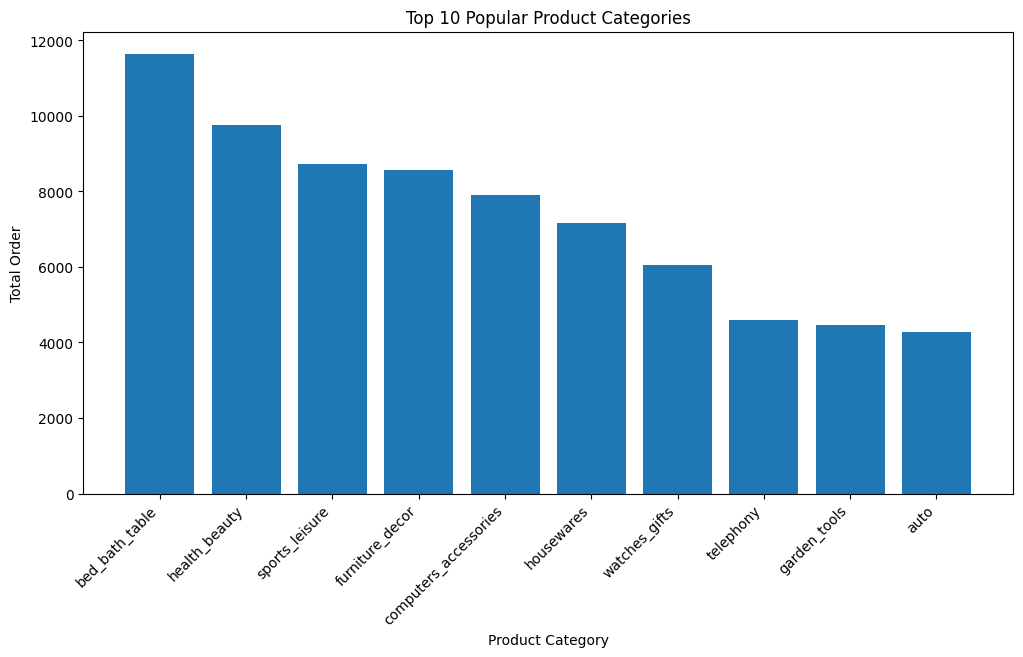

In [53]:
category_popular = df.groupby('product_category_name_english')['order_id'].count().reset_index()

# Sort the data by revenue in descending order
category_popular = category_popular.sort_values(by='order_id', ascending=False)

# Select the top 10 product categories
top_10_categories = category_popular.head(10)

# Create a bar plot for the top 10 product categories generating the most revenue
plt.figure(figsize=(12, 6))
plt.bar(top_10_categories['product_category_name_english'], top_10_categories['order_id'])
plt.xlabel('Product Category')
plt.ylabel('Total Order')
plt.title('Top 10 Popular Product Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

**Cohort analysis? How is customer retention rate?**

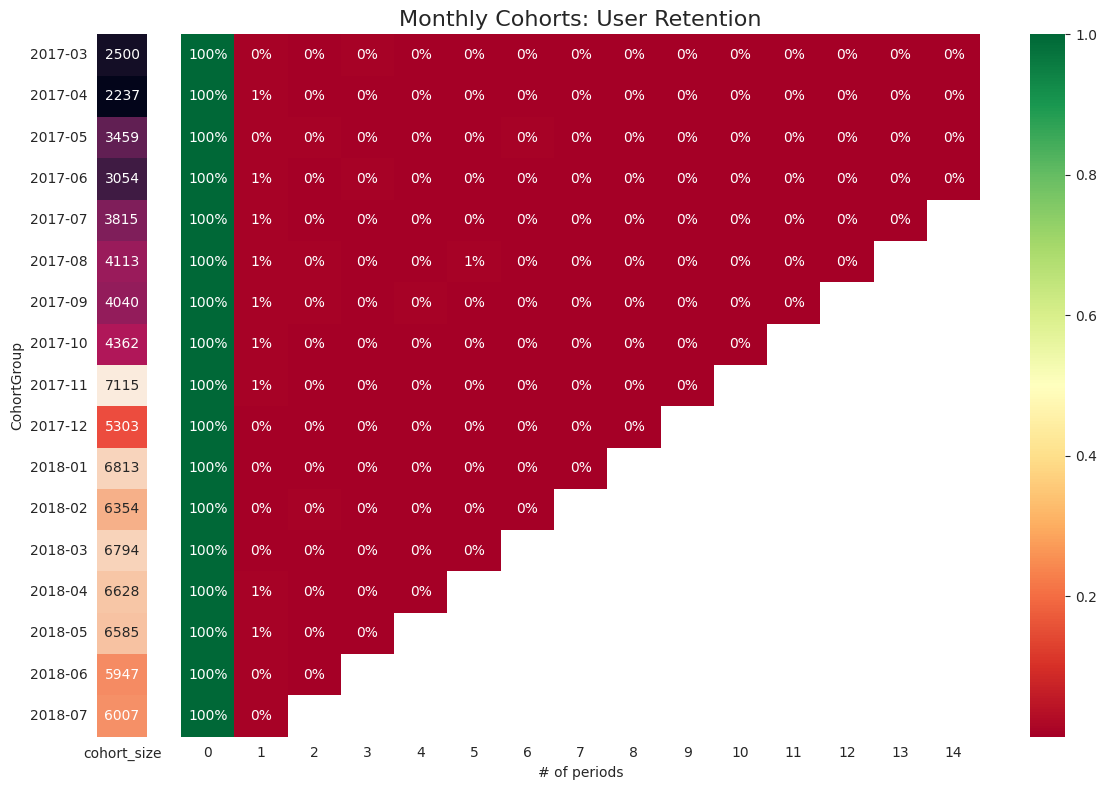

In [54]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 20]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                #cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

99% New customers didn't make transaction next month

# **Data Pre-Processing**

## **Missing Values Check & Handling**

In [55]:
counts = df.isna().sum().sort_values(ascending=False)

percents = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

,null_counts,%
order_id,0,0.0
customer_zip_code_prefix,0,0.0
order_purchase_timestamp,0,0.0
order_approved_at,0,0.0
order_delivered_carrier_date,0,0.0
order_delivered_customer_date,0,0.0
order_estimated_delivery_date,0,0.0
product_category_name_english,0,0.0
customer_unique_id,0,0.0
customer_city,0,0.0


## **Check Duplicated Data**

In [56]:
df.duplicated().sum()

0

Tidak ada duplicated data.

## **Feature Selection & Engineering**

<Axes: >

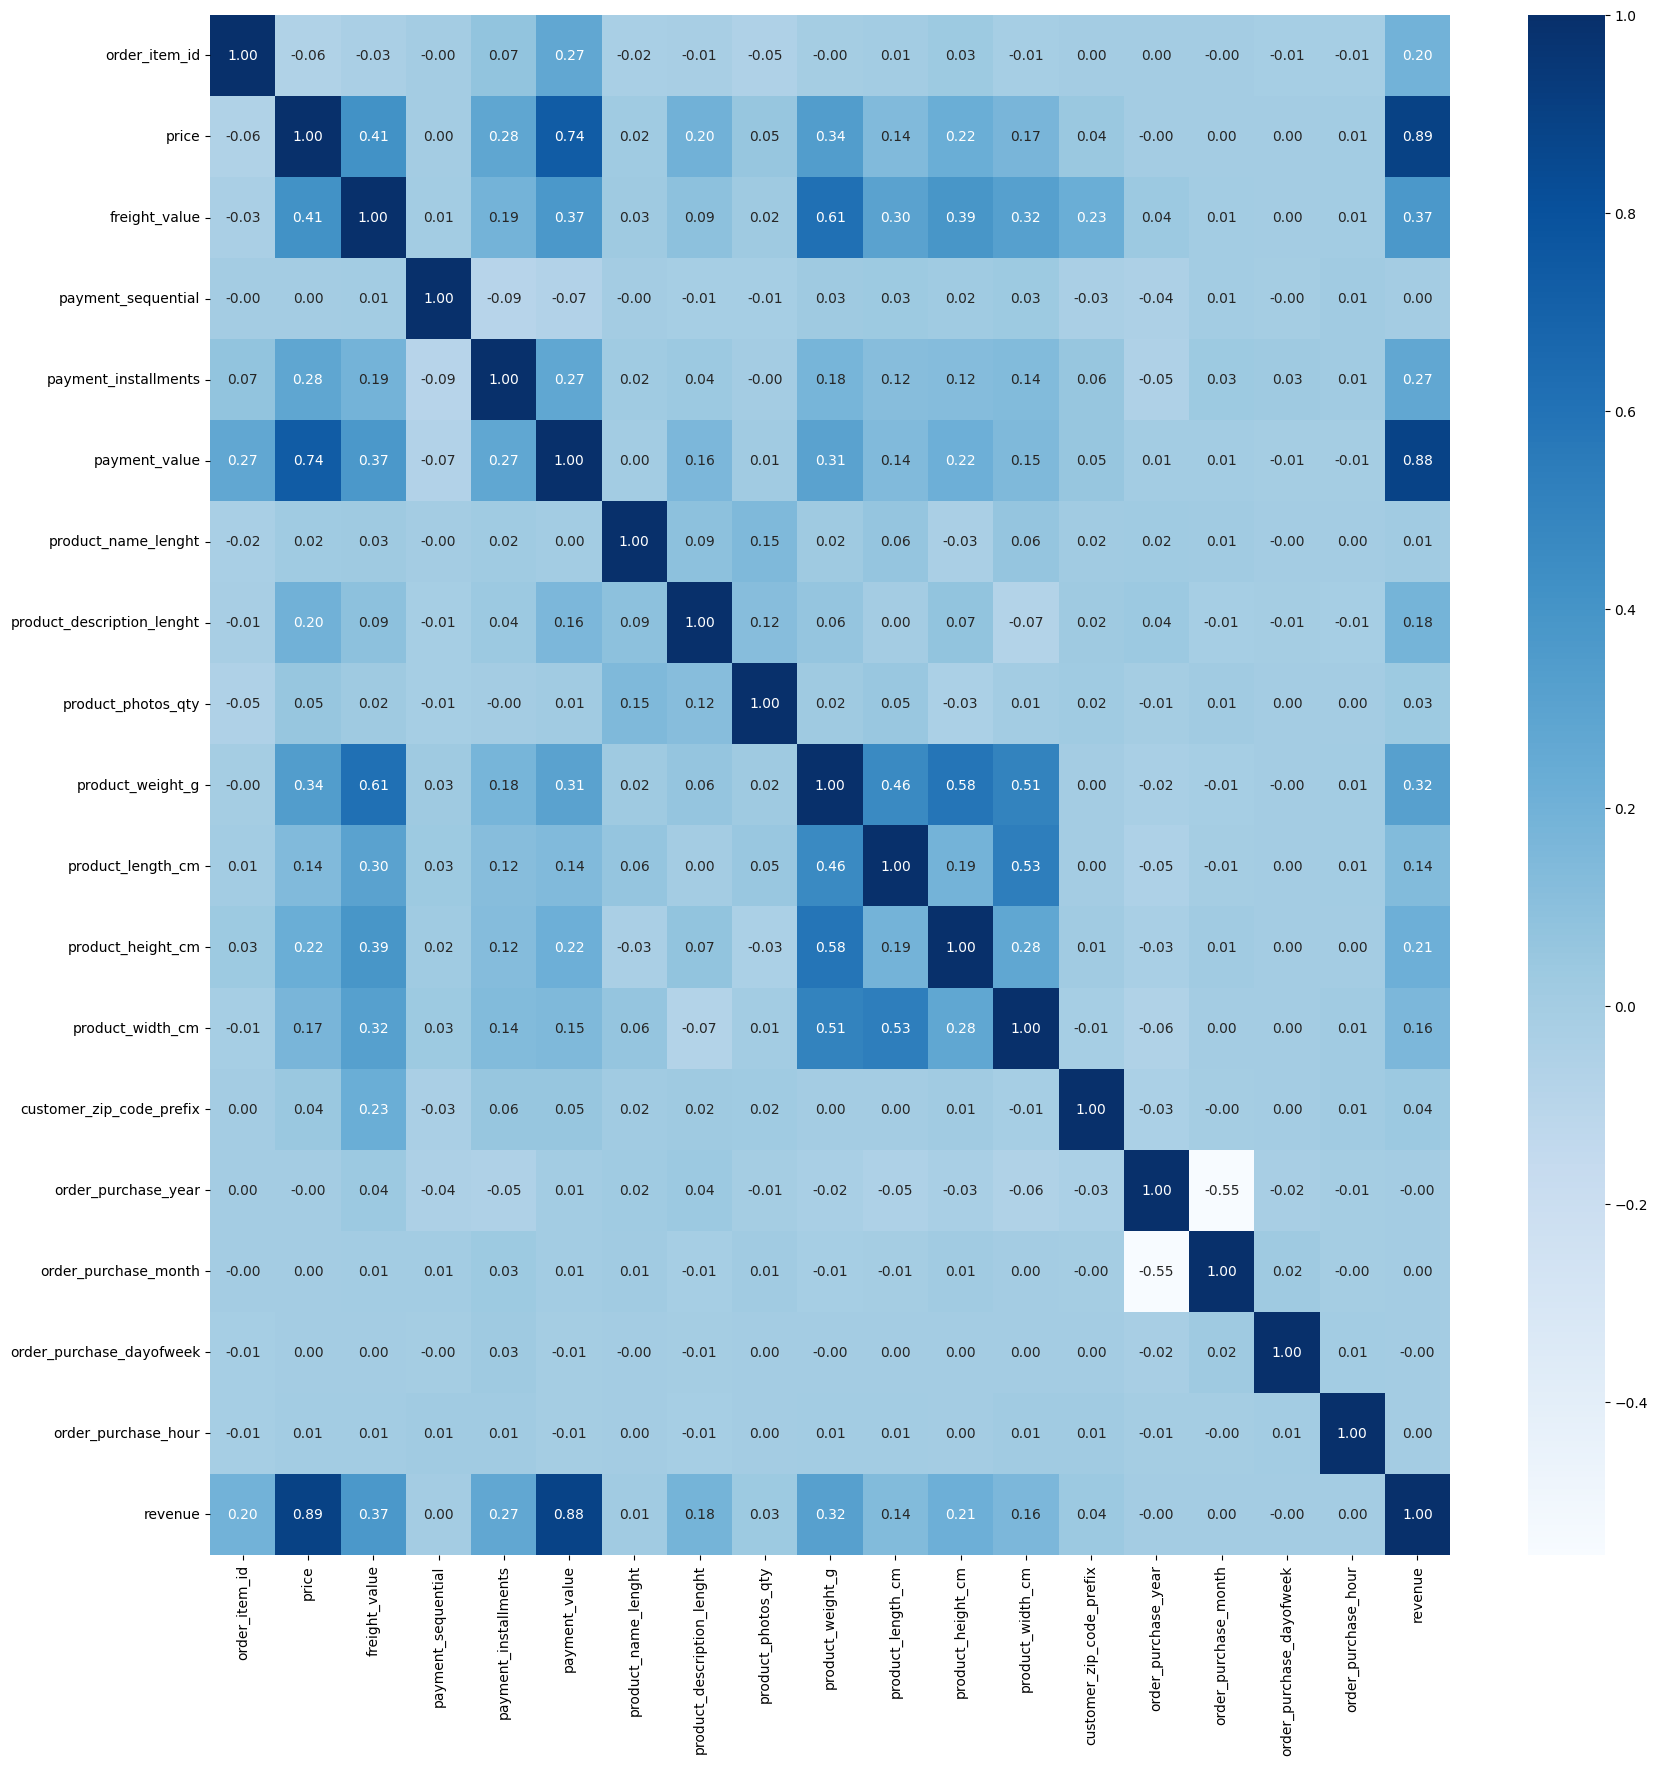

In [57]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Threshold = 0.8

Highly correlated and unused features will be dropped from the dataset: `revenue`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, `payment_sequential`, `payment_installments`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`,`order_purchase_year`, `order_purchase_month`, `order_purchase_dayofweek`, `order_purchase_hour`, `price`, `freight_value`, `customer_zip_code_prefix`, `order_item_id`

In [58]:
dfx = df.copy()

In [59]:
dfx = dfx.drop(['revenue','product_weight_g','product_length_cm','product_height_cm','product_width_cm','payment_sequential','payment_installments','product_name_lenght','product_description_lenght','product_photos_qty','order_purchase_year','order_purchase_month','order_purchase_dayofweek','order_purchase_hour','price','freight_value','customer_zip_code_prefix','order_item_id'], axis = 1)

In [60]:
dfx.head()

,order_id,product_id,seller_id,shipping_limit_date,payment_type,payment_value,product_category_name,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,customer_unique_id,customer_city,customer_state,order_purchase_day,order_purchase_mon
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,credit_card,72.19,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,cool_stuff,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,Wed,Sep
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,boleto,73.86,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,cool_stuff,0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,Wed,Jun
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,credit_card,83.23,cool_stuff,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,cool_stuff,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG,Fri,May
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,credit_card,75.07,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,cool_stuff,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,Tue,Aug
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,credit_card,72.19,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,cool_stuff,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,Thu,Aug


Unused feature will also be dropped

In [61]:
dfx = dfx.drop(['product_id','seller_id','shipping_limit_date','payment_type','product_category_name','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','product_category_name_english','customer_id','customer_city','customer_state','order_purchase_day','order_purchase_mon'], axis = 1)

In [62]:
dfx.head()

,order_id,payment_value,order_status,order_purchase_timestamp,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb
1,130898c0987d1801452a8ed92a670612,73.86,delivered,2017-06-28 11:52:20,0fb8e3eab2d3e79d92bb3fffbb97f188
2,532ed5e14e24ae1f0d735b91524b98b9,83.23,delivered,2018-05-18 10:25:53,3419052c8c6b45daf79c1e426f9e9bcb
3,6f8c31653edb8c83e1a739408b5ff750,75.07,delivered,2017-08-01 18:38:42,e7c828d22c0682c1565252deefbe334d
4,7d19f4ef4d04461989632411b7e588b9,72.19,delivered,2017-08-10 21:48:40,0bb98ba72dcc08e95f9d8cc434e9a2cc


Using the RFM model. The RFM explanation is as follows:
*   R (RECENCY) : Number of days since the last purchase
*   F (FREQUENCY) : Number of transactions made over a given period
*   M (MONETERY) : Amount spent over a given period of time

So the features taken are:
*   order_id
*   Payment Value
*   order_purchase_timestamp

In [63]:
dfx['PurchaseDate'] = dfx.order_purchase_timestamp.apply(lambda x : datetime.strftime(x, '%Y-%m-%d'))

In [64]:
dfx['PurchaseDate'] = pd.to_datetime(dfx['PurchaseDate'])

In [65]:
dfx = dfx.drop(['order_purchase_timestamp'], axis=1)

In [66]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 113366
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            113367 non-null  object        
 1   payment_value       113367 non-null  float64       
 2   order_status        113367 non-null  object        
 3   customer_unique_id  113367 non-null  object        
 4   PurchaseDate        113367 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 5.2+ MB


In [159]:
dfx.head()

,order_id,payment_value,order_status,customer_unique_id,PurchaseDate
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,delivered,871766c5855e863f6eccc05f988b23cb,2017-09-13
1,130898c0987d1801452a8ed92a670612,73.86,delivered,0fb8e3eab2d3e79d92bb3fffbb97f188,2017-06-28
2,532ed5e14e24ae1f0d735b91524b98b9,83.23,delivered,3419052c8c6b45daf79c1e426f9e9bcb,2018-05-18
3,6f8c31653edb8c83e1a739408b5ff750,75.07,delivered,e7c828d22c0682c1565252deefbe334d,2017-08-01
4,7d19f4ef4d04461989632411b7e588b9,72.19,delivered,0bb98ba72dcc08e95f9d8cc434e9a2cc,2017-08-10


In [70]:
cond = dfx['order_status'] == "delivered"
dfx = dfx.loc[cond]

In [71]:
# Create snapshot date
snapshot_date = dfx['PurchaseDate'].max() + timedelta(days=1)
snapshot_date

Timestamp('2018-08-30 00:00:00')

In [72]:
# Grouping by CustomerID
data_process = dfx.groupby(['customer_unique_id']).agg({
        'PurchaseDate': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'})

In [73]:
data_process

,PurchaseDate,order_id,payment_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,448,2,4134.84
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58
ffff371b4d645b6ecea244b27531430a,569,1,112.46


## **Outlier Handling**

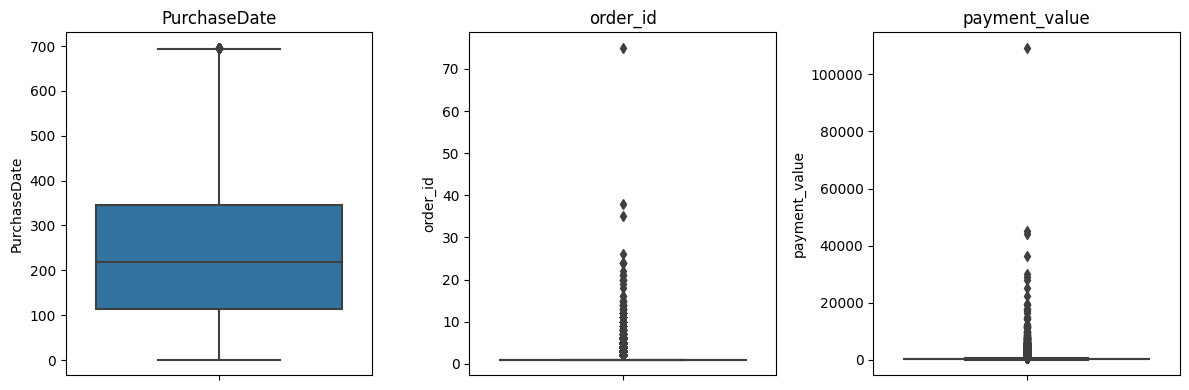

In [74]:
numeric_columns_1 = data_process.select_dtypes(include=['number']).columns

# Create subplots for each numeric column
plt.figure(figsize=(12, 4))
for i, column in enumerate(numeric_columns_1):
    plt.subplot(1, len(numeric_columns_1), i + 1)
    sns.boxplot(y=data_process[column], orient='v')
    plt.title(column)
    plt.tight_layout()

plt.show()

In [75]:
# data_process['PurchaseDate'] = np.log1p(data_process['PurchaseDate'])
# data_process['order_id'] = np.log1p(data_process['order_id'])
# data_process['payment_value'] = np.log1p(data_process['payment_value'])

In [76]:
# numeric_columns_1 = data_process.select_dtypes(include=['number']).columns

# # Create subplots for each numeric column
# plt.figure(figsize=(12, 4))
# for i, column in enumerate(numeric_columns_1):
#     plt.subplot(1, len(numeric_columns_1), i + 1)
#     sns.boxplot(y=data_process[column], orient='v')
#     plt.title(column)
#     plt.tight_layout()

# plt.show()

I decided not to remove the outlier

In [77]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92056 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PurchaseDate   92056 non-null  int64  
 1   order_id       92056 non-null  int64  
 2   payment_value  92056 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.8+ MB


In [78]:
dfa = data_process

In [79]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92056 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PurchaseDate   92056 non-null  int64  
 1   order_id       92056 non-null  int64  
 2   payment_value  92056 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.8+ MB


## **Standarization**

In [80]:
dfa =dfa[~dfa.isin([np.nan, np.inf, -np.inf]).any(1)]

In [81]:
from sklearn.preprocessing import StandardScaler
feature = ['PurchaseDate','order_id','payment_value']
X = dfa[feature].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feature)

In [123]:
dfs.head()

,PurchaseDate,order_id,payment_value,cluster
0,-0.824393,-0.282872,-0.109031,1
1,-0.804727,-0.282872,-0.287240,1
2,1.968288,-0.282872,-0.195534,3
3,0.552280,-0.282872,-0.261715,3
4,0.335946,-0.282872,-0.023601,3


# **Modeling**

**Inertia**

<Axes: >

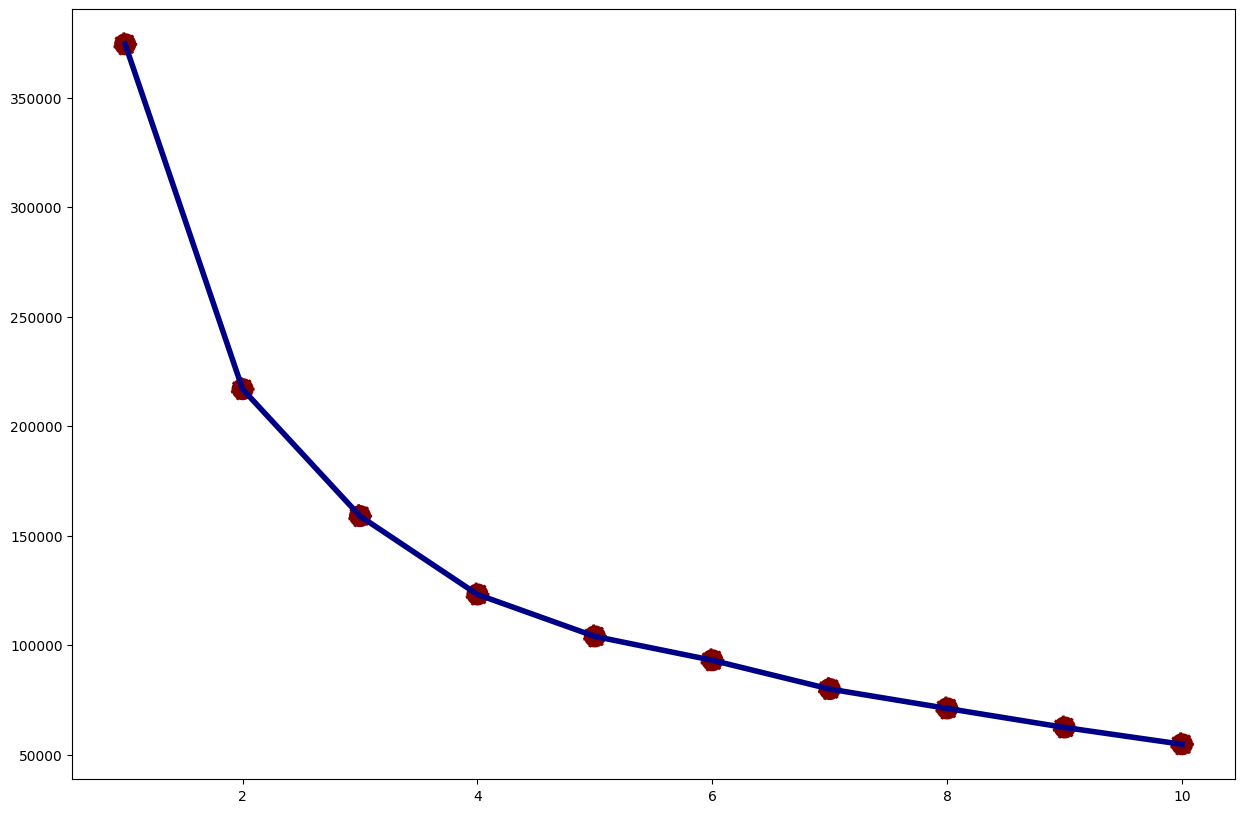

In [154]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(15, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',
                linestyle='--')

**Silhouette Score**

In [84]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [106]:
from sklearn.metrics import silhouette_score
arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(dfs)
    preds = kmeans.predict(dfs)

    score_mahalanobis = silhouette_score(dfs, preds, metric='mahalanobis')
    arr_silhouette_score_mahalanobis.append(score_mahalanobis)

#     score_euclidean = silhouette_score(dfs, preds, metric='euclidean')
#     arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

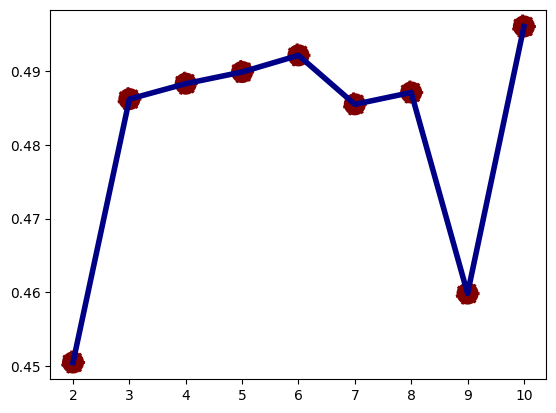

In [107]:
sns.lineplot(x=range(2, 11), y=arr_silhouette_score_mahalanobis, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=arr_silhouette_score_mahalanobis, s=300, color='#800000',  linestyle='--')

In [143]:
# sns.lineplot(x=range(2, 11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
# sns.scatterplot(x=range(2, 11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

In [155]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dfs.values)

KMeans(n_clusters=3, random_state=0)

In [156]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,PurchaseDate,order_id,payment_value,cluster
0,-0.824393,-0.282872,-0.109031,1
1,-0.804727,-0.282872,-0.287240,1
2,1.968288,-0.282872,-0.195534,2
3,0.552280,-0.282872,-0.261715,2
4,0.335946,-0.282872,-0.023601,2


In [157]:
dfa['cluster'] = kmeans.labels_

In [158]:
agg_funcs = {
    'PurchaseDate': ['mean', 'median'],
    'order_id': ['mean', 'median'],
    'payment_value': ['mean', 'median', 'count'],
}

# Group by 'cluster' and apply the specified aggregation functions
summary_stats = dfa.groupby('cluster').agg(agg_funcs)

# Display the summary statistics
display(summary_stats)

PurchaseDate         order_id        payment_value                
                mean median      mean median          mean   median  count
cluster                                                                   
0         229.141732  211.0  4.072835    3.0   1273.051150  647.725   3556
1         127.765146  129.0  1.114410    1.0    169.350622  109.410  50887
2         387.373913  374.0  1.121102    1.0    169.587353  106.970  37613

# **Visualization**

In [149]:
# Melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

In [150]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = dfs['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,0.971091,-0.633640,1
1,0.924296,-0.747267,1
2,-2.211288,0.493554,3
3,-1.333460,-0.009414,3
4,-1.151397,0.080883,3


<Axes: xlabel='PC 1', ylabel='PC 2'>

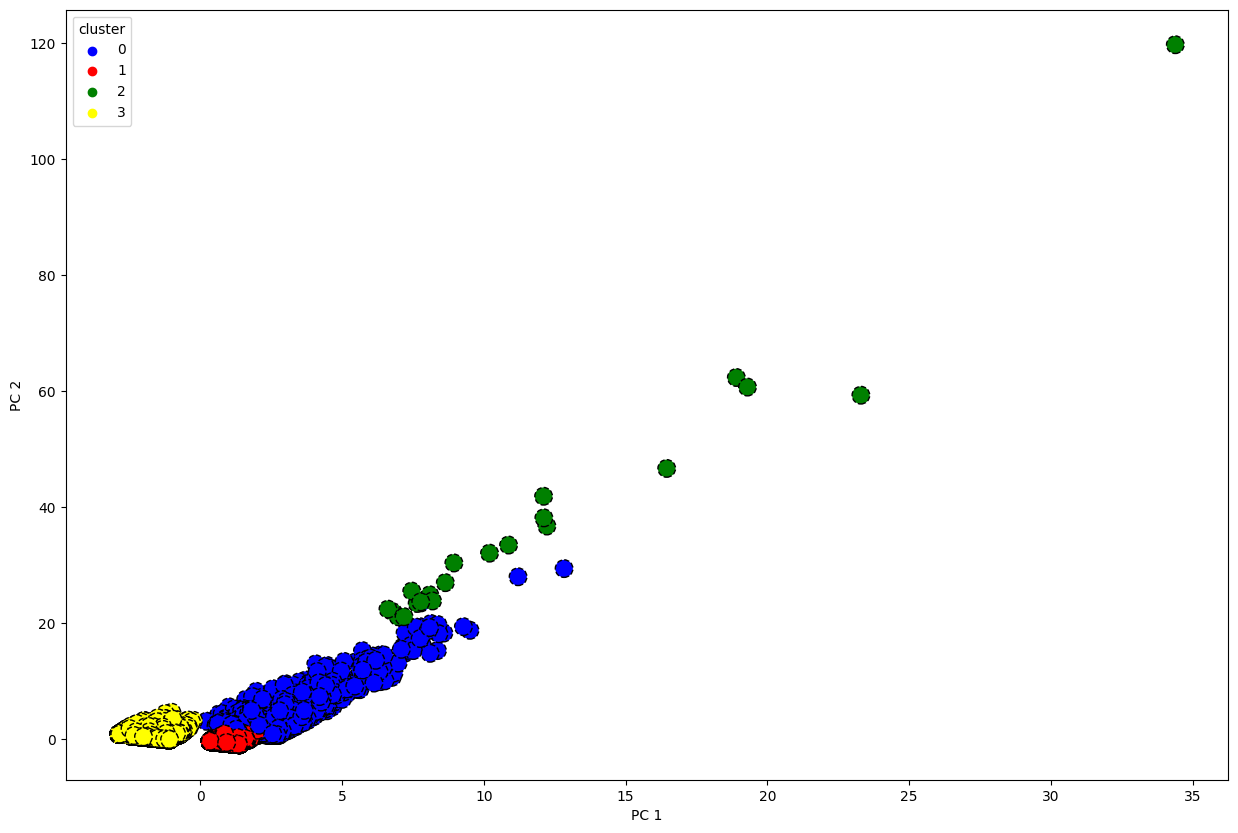

In [151]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)

# **Insight**

**As an average comparison:**

In [152]:
dfa.describe()

,PurchaseDate,order_id,payment_value,cluster
count,92056.000000,92056.000000,92056.000000,92056.000000
mean,237.754280,1.231424,212.081821,1.778928
std,152.542423,0.818130,643.687653,1.032638
min,1.000000,1.000000,9.590000,0.000000
25%,114.000000,1.000000,63.830000,1.000000
50%,219.000000,1.000000,112.810000,1.000000
75%,346.000000,1.000000,202.132500,3.000000
max,696.000000,75.000000,109312.640000,3.000000


**The result:**

In [153]:
agg_funcs = {
    'PurchaseDate': ['median'],
    'order_id': ['median'],
    'payment_value': ['median', 'count'],
}

# Group by 'cluster' and apply the specified aggregation functions
summary_stats = dfa.groupby('cluster').agg(agg_funcs)

# Display the summary statistics
display(summary_stats)

PurchaseDate order_id payment_value       
              median   median        median  count
cluster                                           
0              211.0      3.0       640.485   3542
1              129.0      1.0       109.420  50880
2              231.0     10.0     19342.260     21
3              374.0      1.0       106.970  37613

**Interpretation of each cluster:**
1.   **Cluster 0** with a total of 3542 customers/3.8% of all customers, are average recency (with average transaction occurred 211 days ago), with average to high frequency (3), and are high spenders (with average monetary of 640.485) -> **Potential Loyalist**
2.   **Cluster 1** with a total of 50880 customers/55.3% of all customers, are customers who bought most recently (with average transaction occurred 129 days ago), with low frequency (1), and are medium spenders (with average monetary of 109.420) -> **New Customer**
3.   **Cluster 2** with a total of 21 customers/0.02% of all customers, who are average recency (with average transaction occurred 231 days ago), with high frequency (10), and are high spenders (with average monetary of 19342.260) -> **Big Spender**
4.   **Cluster 3** with a total of 37613 customers/40.9% of all customers, are customers who used to visit and purchase quite low (1 times), but haven’t been visiting recently (with transaction occured 374 days ago), and are low spenders (with average monetary of 106.970) -> **Hibernating Customers**


**Recommendations for each cluster:**
1.   **Cluster 0**: *Offer other relevant products and special discounts. Recreate brand value*. We can try to motivate them to make another purchase by offering discounts
2.   **Cluster 1**: *Provide onboarding support, give them early success, start building relationship*. We do not know these customers yet so they still have the potential to turn up as highly valuable. We should offer them discounts for an additional product in the basket to see whether they are the kinds of the customer to whom we can upsell. We should also try to get their consent for our newsletter so that we can include them in our regular marketing communication. We can also send them satisfaction surveys concerning their recent order so that we get a better awareness of who these customers are and what they want
3.   **Cluster 2**: *Offer membership or loyalty programs or recommend related products* to upsell them (Upsell higher value products) and help them become our Loyalists or Champions, Ask for reviews. Engage them
4.   **Cluster 3**: *Share valuable resources, recommend popular products / renewals at discount, reconnect with them*